# Simple Input

![jupyter](./Bipolar_SFQ_Generator.png)

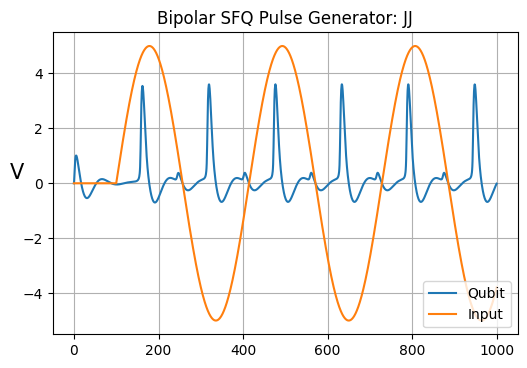

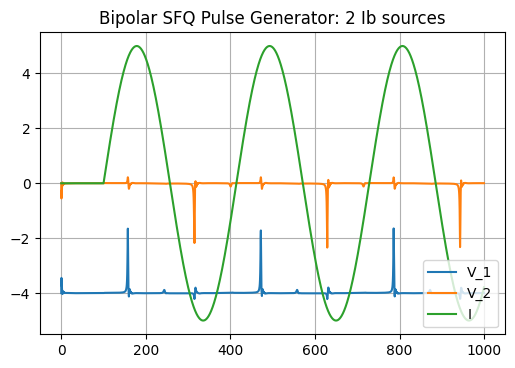

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import C, JJ, Sine_current, DC_SFQ_1, DC_SFQ_2, Pulses, L, Ib, DC_SFQ, R
from FunctionCompiler import *

C_c = 10


dc_sfq_1 = DC_SFQ_1.DC_SFQ_1(loc=[1,6,2])
dc_sfq_2 = DC_SFQ_1.DC_SFQ_1(loc=[1,7,3])

C1 = C.C(loc=[2,4],c=2*C_c)
C2 = C.C(loc=[3,5],c=2*C_c)

C_Q = C.C(loc=[4,5],c=0.01)
JJ1 = JJ.JJ(loc=[4,5],A=0.1,c=0.1,r=1)

Ib1 = Ib.Ib(loc=[6], val=3)
Ib2 = Ib.Ib(loc=[7], val=-3)


pulse_1 = Sine_current.Sine_current(loc=[1], A = 5, t0 = 100,w=0.02,length=20000)

t = np.arange(0, 1000, 0.5)
fc = FunctionCompiler([ pulse_1, C1, C2,Ib1, Ib2, dc_sfq_1, dc_sfq_2, C_Q, JJ1],t)

sol = fc.solve()
#fc.object_dict

V_1 = fc.object_dict['DC_SFQ1_J4'].get_data("V",t,sol);
V_2 = fc.object_dict['DC_SFQ2_J4'].get_data("V",t,sol);

V_JJ = JJ1.get_data("P",t,sol);
I_JJ = JJ1.get_data("I",t,sol)
V_C_Q = C_Q.get_data("V",t,sol)

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_JJ)
ax.grid('on')
plt.ylabel('V',rotation=0,fontsize=15)
plt.title('Bipolar SFQ Pulse Generator: JJ')
#ax.plot(t, V_JJ+4)
ax.plot(t,pulse_1.get_data("I",t,sol))
ax.legend(['Qubit','Input'], loc='lower right')

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_1-4)

ax.plot(t, V_2)
ax.grid('on')
plt.title('Bipolar SFQ Pulse Generator: 2 Ib sources')
#ax.plot(t, V_JJ+4)
ax.plot(t,pulse_1.get_data("I",t,sol))
ax.legend(['V_1','V_2','I'], loc='lower right')

# Var ?: with TFF

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import C, JJ, Sine_current, DC_SFQ_1, DC_SFQ_2, Pulses, L, Ib, DC_SFQ, R, TFF
from FunctionCompiler import *

In [2]:
C_c = 10

In [30]:
tff_in = TFF.TFF(loc=[1,2,3])

dc_sfq_1 = DC_SFQ_1.DC_SFQ_1(loc=[2,8,4])
dc_sfq_2 = DC_SFQ_1.DC_SFQ_1(loc=[3,9,5])

C1 = C.C(loc=[4,6],c=2*C_c)
C2 = C.C(loc=[5,7],c=2*C_c)

C_Q = C.C(loc=[6,7],c=0.01)
JJ1 = JJ.JJ(loc=[6,7],A=0.1,c=0.1,r=1)

Ib1 = Ib.Ib(loc=[8], val=3)
Ib2 = Ib.Ib(loc=[9], val=-3)

#pulse_1 = Pulses.Pulses(loc=[1], A =4, t0 = 30, T=50)
pulse_1 = Sine_current.Sine_current(loc=[1], A = 8, t0 = 100,w=0.02,length=20000)

t = np.arange(0, 500, 0.5)
fc = FunctionCompiler([tff_in, pulse_1, C1, C2,Ib1, Ib2, dc_sfq_1, dc_sfq_2, C_Q, JJ1],t)

sol = fc.solve()
#fc.object_dict

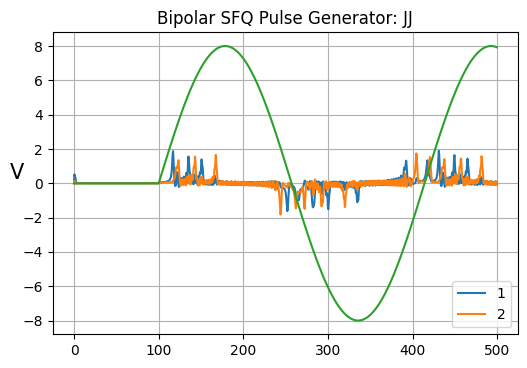

In [31]:
V_JJ1 = fc.object_dict['TFF1_J1'].get_data("V",t,sol);
V_JJ3 = fc.object_dict['TFF1_J3'].get_data("V",t,sol);

V_1 = fc.object_dict['DC_SFQ1_J4'].get_data("V",t,sol);
V_2 = fc.object_dict['DC_SFQ2_J4'].get_data("V",t,sol);

V_JJ = JJ1.get_data("P",t,sol);
I_JJ = JJ1.get_data("I",t,sol)
V_C_Q = C_Q.get_data("V",t,sol)

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_JJ1)
ax.plot(t,V_JJ3)
ax.grid('on')
plt.ylabel('V',rotation=0,fontsize=15)
plt.title('Bipolar SFQ Pulse Generator: JJ')
#ax.plot(t, V_JJ+4)
ax.plot(t,pulse_1.get_data("I",t,sol))
ax.legend(['1','2'], loc='lower right')

# Var 1

In [33]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import C, JJ, Sine_current, DC_SFQ_1, Pulses, L, MutualInductance, Ib
from FunctionCompiler import *

C_c = 1

mutual = MutualInductance.MutualInductance(loc=[1,0,2,0],L1 = 1, L2 = 2, k=2)

dc_sfq_1 = DC_SFQ_1.DC_SFQ_1(loc=[2,7,3])
dc_sfq_2 = DC_SFQ_1.DC_SFQ_1(loc=[2,8,4])

C1 = C.C(loc=[3,5],c=2*C_c)
C2 = C.C(loc=[4,6],c=2*C_c)

C_Q = C.C(loc=[5,6],c=0.001)
JJ1 = JJ.JJ(loc=[5,6],A=0.1,c=1,r=1)

L1 = L.L(loc=[7,9],val=1)
L2 = L.L(loc=[8,9],val=1)

Current_source = Ib.Ib(loc=[9],val=7)


pulse_1 = Sine_current.Sine_current(loc=[1], A = 5, t0 = 100, w=0.05, length=20000)


L_add = L.L(loc=[7,8],val=1)
t = np.arange(0, 1000, 0.5)
fc = FunctionCompiler([L1, L2, Current_source, pulse_1, mutual, C1, C2, dc_sfq_1, dc_sfq_2, C_Q, JJ1],t)

sol = fc.solve()
#fc.object_dict

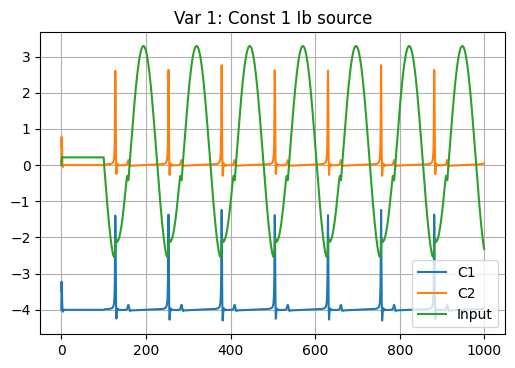

In [35]:
V_1 = fc.object_dict['DC_SFQ1_J4'].get_data("V",t,sol);
V_2 = fc.object_dict['DC_SFQ2_J4'].get_data("V",t,sol);
Input =pulse_1.get_data("I",t,sol)
V_JJ = JJ1.get_data("V",t,sol);

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_1-4)
ax.plot(t, V_2)
#ax.plot(t,V_JJ)
ax.grid('on')
plt.title('Var 1: Const 1 Ib source')
#ax.plot(t, V_JJ+4)
#ax.plot(t,Input)
ax.plot(t,fc.object_dict['MutualInductance1'].get_data("I2",t,sol))
ax.legend(['C1','C2','Input'], loc='lower right')

# Var 1: my version

In [39]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import C, JJ, Sine_current, DC_SFQ_1, Pulses, L, MutualInductance, Ib, Square_pulse
from FunctionCompiler import *

In [44]:
C_c = 1

mutual = MutualInductance.MutualInductance(loc=[1,0,2,0],L1 = 1, L2 = 2, k=2)

dc_sfq_1 = DC_SFQ_1.DC_SFQ_1(loc=[2,7,3])
dc_sfq_2 = DC_SFQ_1.DC_SFQ_1(loc=[2,8,4])

C1 = C.C(loc=[3,5],c=2*C_c)
C2 = C.C(loc=[4,6],c=2*C_c)

C_Q = C.C(loc=[5,6],c=0.001)
JJ1 = JJ.JJ(loc=[5,6],A=0.1,c=1,r=1)

L1 = L.L(loc=[7,9],val=1)
L2 = L.L(loc=[8,9],val=1)

Current_source_1 = Square_pulse.Square_pulse(loc=[9],t0=50, length=100,A=6)
Current_source_2 = Square_pulse.Square_pulse(loc=[9],t0=150, length=100,A=-6)


pulse_1 = Sine_current.Sine_current(loc=[1], A = 5, t0 = 100, w=0.05, length=20000)


L_add = L.L(loc=[7,8],val=1)
t = np.arange(0, 1000, 0.5)
fc = FunctionCompiler([L1, L2, Current_source_1,Current_source_2, pulse_1, mutual, C1, C2, dc_sfq_1, dc_sfq_2, C_Q, JJ1],t)

sol = fc.solve()
#fc.object_dict

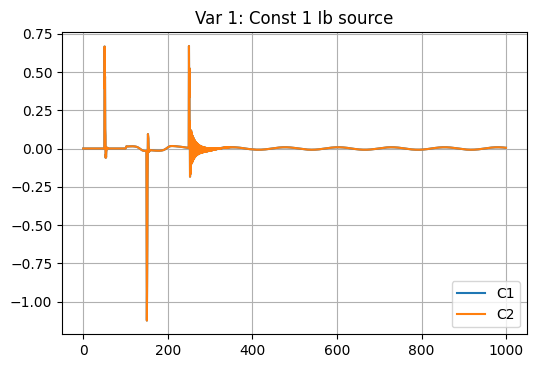

In [49]:
V_1 = fc.object_dict['DC_SFQ1_J4'].get_data("V",t,sol);
V_2 = fc.object_dict['DC_SFQ2_J4'].get_data("V",t,sol);

Input =pulse_1.get_data("I",t,sol)
V_JJ = JJ1.get_data("V",t,sol);

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_1)
ax.plot(t, V_2)
#ax.plot(t,V_JJ)
ax.grid('on')
plt.title('Var 1: Const 1 Ib source')
#ax.plot(t, V_JJ+4)
#ax.plot(t,Input)
#ax.plot(t,fc.object_dict['MutualInductance1'].get_data("I2",t,sol))
ax.legend(['C1','C2','Input'], loc='lower right')

# Var 2

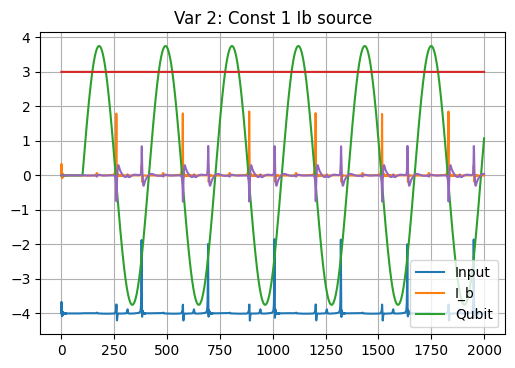

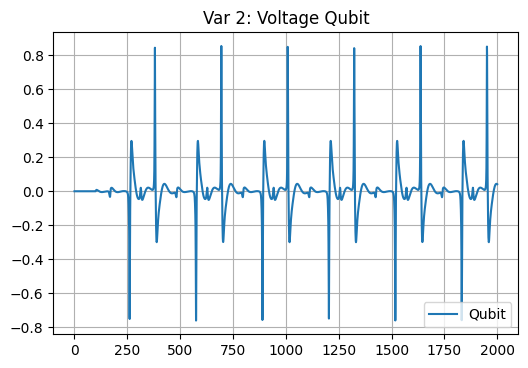

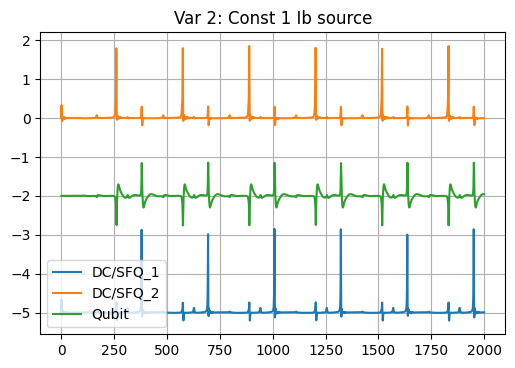

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import JJ, Sine_current, Pulses, L,Ib, Square_pulse, DC_SFQ_1,MutualInductance, C
from FunctionCompiler import *

C_c = 10

mutual = MutualInductance.MutualInductance(loc=[1,0,2,3],L1 = 2, L2 = 2, k=5)

dc_sfq_1 = DC_SFQ_1.DC_SFQ_1(loc=[2,8,4])
dc_sfq_2 = DC_SFQ_1.DC_SFQ_1(loc=[3,9,5])

C1 = C.C(loc=[4,6],c=2*C_c)
C2 = C.C(loc=[5,7],c=2*C_c)

C_Q = C.C(loc=[6,7],c=0.01)
JJ1 = JJ.JJ(loc=[6,7],A=0.1,c=0.1,r=1)

L1 = L.L(loc=[8,10],val=1)
L2 = L.L(loc=[9,10],val=1)

Current_source = Ib.Ib(loc=[10],val=3)
pulse_1 = Sine_current.Sine_current(loc=[1], A = 3.75, t0 = 100, w=0.02, length=20000)

t = np.arange(0, 2000, 0.5)
fc = FunctionCompiler([L1, L2, Current_source, pulse_1, mutual, C1, C2, dc_sfq_1, dc_sfq_2, C_Q, JJ1],t)

sol = fc.solve()
#fc.object_dict

V_1 = fc.object_dict['DC_SFQ1_J4'].get_data("V",t,sol);
V_2 = fc.object_dict['DC_SFQ2_J4'].get_data("V",t,sol);
Input_V = mutual.get_data("V1",t,sol);
Input =pulse_1.get_data("I",t,sol)
V_JJ = JJ1.get_data("V",t,sol);

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_1-4)
ax.plot(t, V_2)
ax.grid('on')
plt.title('Var 2: Const 1 Ib source')
#ax.plot(t, V_JJ+4)
ax.plot(t,Input)
ax.plot(t, Current_source.get_data("I",t,sol))
ax.plot(t, V_JJ)
#ax.plot(t,fc.object_dict['MutualInductance1'].get_data("I2",t,sol))
ax.legend(['Input','I_b','Qubit'], loc='lower right')


fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_JJ)
ax.grid('on')
plt.title('Var 2: Voltage Qubit')
#ax.plot(t, V_JJ+4)
#ax.plot(t,Input)
#ax.plot(t,fc.object_dict['MutualInductance1'].get_data("I2",t,sol))
ax.legend(['Qubit','Input'], loc='lower right')

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_1-5)
ax.plot(t, V_2)
ax.grid('on')
plt.title('Var 2: Const 1 Ib source')
#ax.plot(t,Input)
ax.plot(t,V_JJ-2)
ax.legend(['DC/SFQ_1','DC/SFQ_2','Qubit'], loc='lower left')

# New JTL

In [17]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import JJ, Sine_current, Pulses, L,Ib, Square_pulse, R
from FunctionCompiler import *

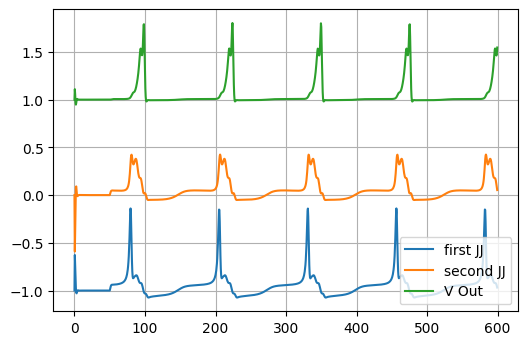

In [329]:
i_val=0.75

JJ_1 = JJ.JJ(loc=[1,0],A=1,c=1,r=1)
JJ_2 = JJ.JJ(loc=[3,0],A=i_val,c=1,r=1)
JJ_3 = JJ.JJ(loc=[4,0],A=i_val,c=1,r=1)
JJ_4 = JJ.JJ(loc=[5,0],A=i_val,c=1,r=1)
JJ_5 = JJ.JJ(loc=[6,0],A=i_val,c=1,r=1)
JJ_6 = JJ.JJ(loc=[8,0],A=1,c=1,r=1)

i_in = 2.5

l_val=np.pi/i_in/2
L_1 = L.L(loc=[1,2],val=l_val)
L_2 = L.L(loc=[2,3],val=l_val)
L_3 = L.L(loc=[3,4],val=l_val)
L_4 = L.L(loc=[4,5],val=l_val)
L_5 = L.L(loc=[5,6],val=l_val)
L_6 = L.L(loc=[6,7],val=l_val)
L_7 = L.L(loc=[7,8],val=l_val)

a=1
Ib1 = Ib.Ib(loc=[1], val=a)
Ib2 = Ib.Ib(loc=[3], val=-2*a)
Ib3 = Ib.Ib(loc=[4], val=2*a)
Ib4 = Ib.Ib(loc=[5], val=-2*a)
Ib5 = Ib.Ib(loc=[6], val=2*a)
Ib6 = Ib.Ib(loc=[8], val=-a)


I_input = Sine_current.Sine_current(loc=[2], A = i_in, t0 = 50, w=0.05, length=2000)


t = np.arange(0, 600, 0.5)
#fc = FunctionCompiler([ JJ_1, JJ_2, JJ_3, JJ_4, JJ_5, JJ_6, L_1, L_2, L_3, L_4, L_5, L_6, L_7, Ib1, Ib2, Ib3, Ib4, Ib5, Ib6, I_input],t)
fc = FunctionCompiler([JJ_1, JJ_2, JJ_3, JJ_4, JJ_5,JJ_6, L_1, L_2, L_3, L_4, L_5,L_6, L_7, Ib1, Ib2, Ib3, Ib4, Ib5, Ib6,I_input],t)

sol = fc.solve()

V_JJ1 = JJ_1.get_data("V",t,sol);
V_JJ2 = JJ_2.get_data("V",t,sol);
Input = I_input.get_data("I",t,sol);
V_JJ3 = JJ_3.get_data("V",t,sol);
V_JJ4 = JJ_4.get_data("V",t,sol);
V_JJ5 = JJ_5.get_data("V",t,sol);
V_out =L_7.get_data("V",t,sol)+JJ_6.get_data("V",t,sol);

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_JJ1-1)
ax.plot(t, V_JJ2)
ax.plot(t,V_out+1)
#ax.plot(t,I_input.get_data("I",t,sol))
ax.grid('on')
ax.legend(['first JJ','second JJ','V Out'], loc='lower right')

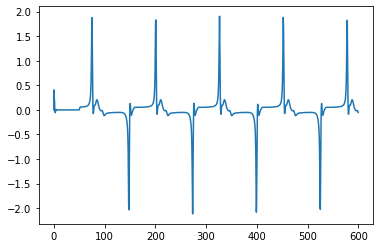

In [321]:
i_val=1

JJ_1 = JJ.JJ(loc=[1,0],A=1.5,c=1,r=1)
JJ_2 = JJ.JJ(loc=[3,0],A=i_val,c=1,r=1)
JJ_3 = JJ.JJ(loc=[4,0],A=i_val,c=1,r=1)
JJ_4 = JJ.JJ(loc=[5,0],A=i_val,c=1,r=1)
JJ_5 = JJ.JJ(loc=[6,0],A=i_val,c=1,r=1)
JJ_6 = JJ.JJ(loc=[8,0],A=1.5,c=1,r=1)

i_in = 3.14

l_val=np.pi/i_in
L_1 = L.L(loc=[1,2],val=l_val)
L_2 = L.L(loc=[2,3],val=l_val)
L_3 = L.L(loc=[3,4],val=l_val)
L_4 = L.L(loc=[4,5],val=l_val)
L_5 = L.L(loc=[5,6],val=l_val)
L_6 = L.L(loc=[6,7],val=l_val)
L_7 = L.L(loc=[7,8],val=l_val)

a=1
Ib1 = Ib.Ib(loc=[1], val=a)
Ib2 = Ib.Ib(loc=[3], val=-2*a)
Ib3 = Ib.Ib(loc=[4], val=2*a)
Ib4 = Ib.Ib(loc=[5], val=-2*a)
Ib5 = Ib.Ib(loc=[6], val=2*a)
Ib6 = Ib.Ib(loc=[8], val=-a)


I_input = Sine_current.Sine_current(loc=[2], A = i_in, t0 = 50, w=0.05, length=2000)


t = np.arange(0, 600, 0.5)
#fc = FunctionCompiler([ JJ_1, JJ_2, JJ_3, JJ_4, JJ_5, JJ_6, L_1, L_2, L_3, L_4, L_5, L_6, L_7, Ib1, Ib2, Ib3, Ib4, Ib5, Ib6, I_input],t)
fc = FunctionCompiler([JJ_1, JJ_2, JJ_3, JJ_4, JJ_5,JJ_6, L_1, L_2, L_3, L_4, L_5,L_6, L_7, Ib1, Ib2, Ib3, Ib4, Ib5, Ib6,I_input],t)

sol = fc.solve()

V_JJ1 = JJ_1.get_data("V",t,sol);
V_JJ2 = JJ_2.get_data("V",t,sol);
Input = I_input.get_data("I",t,sol);
V_JJ3 = JJ_3.get_data("V",t,sol);
V_JJ4 = JJ_4.get_data("V",t,sol);
V_JJ5 = JJ_5.get_data("V",t,sol);
V_out =L_7.get_data("V",t,sol)+JJ_6.get_data("V",t,sol);

plt.plot(t,V_JJ1)

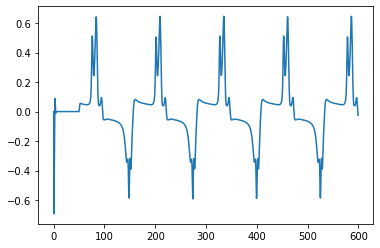

In [322]:
plt.plot(t,V_JJ2)

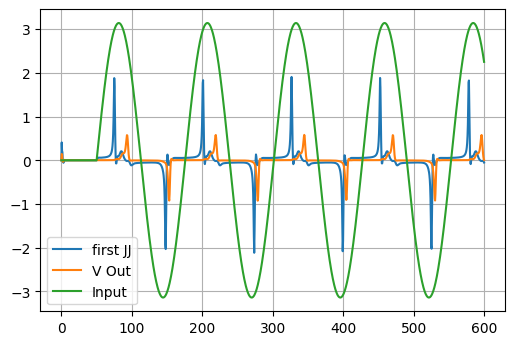

In [323]:
fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_JJ1)
ax.plot(t,V_out)
ax.plot(t,I_input.get_data("I",t,sol))
ax.grid('on')
ax.legend(['first JJ','V Out','Input'], loc='lower left')

# Amplifier

In [177]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import JJ, Sine_current, Pulses, L,Ib, Square_pulse, JTL
from FunctionCompiler import *

In [268]:
jtl_in = JTL.JTL(loc=[1,2],N=5)
L_in = L.L(loc=[2,3],val=1)

JJin_1 = JJ.JJ(loc=[3,0],A=1,c=1,r=1)
JJin_2 = JJ.JJ(loc=[3,4],A=1,c=1,r=1)
JJin_3 = JJ.JJ(loc=[4,5],A=1,c=1,r=1)
JJin_4 = JJ.JJ(loc=[5,6],A=1,c=1,r=1)
JJin_5 = JJ.JJ(loc=[6,7],A=1,c=1,r=1)

L_left = L.L(loc=[7,8],val=1)
L_right = L.L(loc=[8,9],val=1)

Ib_source = Ib.Ib(loc=[8],val=1.75)

JJout_1 = JJ.JJ(loc=[9,10],A=1,c=1,r=1)
JJout_2 = JJ.JJ(loc=[10,11],A=1,c=1,r=1)
JJout_3 = JJ.JJ(loc=[11,12],A=1,c=1,r=1)
JJout_4 = JJ.JJ(loc=[12,13],A=1,c=1,r=1)
JJout_5 = JJ.JJ(loc=[13,0],A=1,c=1,r=1)

Input = Pulses.Pulses(loc=[1],A=1,t0=100,T=200)

t = np.arange(0, 450, 0.5)
fc = FunctionCompiler([Input, jtl_in, L_in, JJin_1, JJin_2, JJin_3, JJin_4, JJin_5, L_left, L_right, Ib_source, JJout_1, JJout_2, JJout_3, JJout_4, JJout_5],t)

sol = fc.solve()

In [269]:
V_in = fc.object_dict['JTL1_JJ1'].get_data("V",t,sol);
V_before = JJin_1.get_data("V",t,sol);
V_out = JJout_1.get_data("V",t,sol)+JJout_2.get_data("V",t,sol)+JJout_3.get_data("V",t,sol)+JJout_4.get_data("V",t,sol)+JJout_5.get_data("V",t,sol);

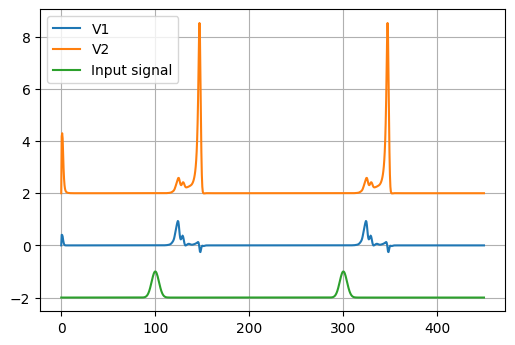

In [274]:
fig, ax = plt.subplots(dpi=100)
#ax.plot(t,V_in)
ax.plot(t,V_before)
ax.plot(t,V_out+2)
ax.grid('on')
ax.plot(t,Input.get_data("I",t,sol)-2)
ax.legend(['V1','V2','Input signal'])